# STATISTICS MINI PROJECT

# Author: Muthu Krishnan L


# Problem statement

You were recently hired as a business analyst in a top sports company. The senior management team has asked you to come up with metrics with which they can gauge which team will win the upcoming La Liga cup (Football tournament). The given data set contains information on all the teams that have so far participated in all the past tournaments. It has data about how many goals each team scored, conceded; how many times they came within the first 6 positions, how many seasons they have qualified, their best position in the past, etc. You are required to do the following:

Before doing any analysis it would be a good idea to check for any hypens or other symbols the data set and make appropriate replacements to make sure you can perform arithmetic operations on the data. Prepare a short report to answer the following questions:



Load Required Libraries

In [ ]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings
filterwarnings('ignore')
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from scipy import stats
import statistics
from scipy.stats import shapiro
from scipy.stats import chi2_contingency
from scipy.stats import chi2
from scipy.stats import chisquare
from statsmodels.stats import weightstats as stests
import statsmodels.stats.multicomp as mc
import scikit_posthocs

Importing the dataset

In [2]:
laliga=pd.read_csv("Laliga.csv")
laliga.head(2)

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19
0,Pos,Team,Seasons,Points,GamesPlayed,GamesWon,GamesDrawn,GamesLost,GoalsFor,GoalsAgainst,Champion,Runner-up,Third,Fourth,Fifth,Sixth,T,Debut,Since/LastApp,BestPosition
1,1,Real Madrid,86,4385,2762,1647,552,563,5947,3140,33,23,8,8,3,4,79,1929,1929,1


In [3]:
dict1=dict(laliga.iloc[0])
print(dict1)

{'Unnamed: 0': 'Pos', 'Unnamed: 1': 'Team', 'Unnamed: 2': 'Seasons', 'Unnamed: 3': 'Points', 'Unnamed: 4': 'GamesPlayed', 'Unnamed: 5': 'GamesWon', 'Unnamed: 6': 'GamesDrawn', 'Unnamed: 7': 'GamesLost', 'Unnamed: 8': 'GoalsFor', 'Unnamed: 9': 'GoalsAgainst', 'Unnamed: 10': 'Champion', 'Unnamed: 11': 'Runner-up', 'Unnamed: 12': 'Third', 'Unnamed: 13': 'Fourth', 'Unnamed: 14': 'Fifth', 'Unnamed: 15': 'Sixth', 'Unnamed: 16': 'T', 'Unnamed: 17': 'Debut', 'Unnamed: 18': 'Since/LastApp', 'Unnamed: 19': 'BestPosition'}


In [4]:
laliga.rename(columns=dict1,inplace=True)

In [5]:
laliga.head(2)

,Pos,Team,Seasons,Points,GamesPlayed,GamesWon,GamesDrawn,GamesLost,GoalsFor,GoalsAgainst,Champion,Runner-up,Third,Fourth,Fifth,Sixth,T,Debut,Since/LastApp,BestPosition
0,Pos,Team,Seasons,Points,GamesPlayed,GamesWon,GamesDrawn,GamesLost,GoalsFor,GoalsAgainst,Champion,Runner-up,Third,Fourth,Fifth,Sixth,T,Debut,Since/LastApp,BestPosition
1,1,Real Madrid,86,4385,2762,1647,552,563,5947,3140,33,23,8,8,3,4,79,1929,1929,1


In [6]:
laliga.drop([0],axis=0,inplace=True)

In [7]:
laliga.head(2)

,Pos,Team,Seasons,Points,GamesPlayed,GamesWon,GamesDrawn,GamesLost,GoalsFor,GoalsAgainst,Champion,Runner-up,Third,Fourth,Fifth,Sixth,T,Debut,Since/LastApp,BestPosition
1,1,Real Madrid,86,4385,2762,1647,552,563,5947,3140,33,23,8,8,3,4,79,1929,1929,1
2,2,Barcelona,86,4262,2762,1581,573,608,5900,3114,25,25,12,12,4,6,83,1929,1929,1


In [8]:
laliga.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 61 entries, 1 to 61
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Pos            61 non-null     object
 1   Team           61 non-null     object
 2   Seasons        61 non-null     object
 3   Points         61 non-null     object
 4   GamesPlayed    61 non-null     object
 5   GamesWon       61 non-null     object
 6   GamesDrawn     61 non-null     object
 7   GamesLost      61 non-null     object
 8   GoalsFor       61 non-null     object
 9   GoalsAgainst   61 non-null     object
 10  Champion       61 non-null     object
 11  Runner-up      61 non-null     object
 12  Third          61 non-null     object
 13  Fourth         61 non-null     object
 14  Fifth          61 non-null     object
 15  Sixth          61 non-null     object
 16  T              61 non-null     object
 17  Debut          61 non-null     object
 18  Since/LastApp  61 non-null     o

In [9]:
laliga.replace("-","0",inplace=True)
laliga

,Pos,Team,Seasons,Points,GamesPlayed,GamesWon,GamesDrawn,GamesLost,GoalsFor,GoalsAgainst,Champion,Runner-up,Third,Fourth,Fifth,Sixth,T,Debut,Since/LastApp,BestPosition
1,1,Real Madrid,86,4385,2762,1647,552,563,5947,3140,33,23,8,8,3,4,79,1929,1929,1
2,2,Barcelona,86,4262,2762,1581,573,608,5900,3114,25,25,12,12,4,6,83,1929,1929,1
3,3,Atletico Madrid,80,3442,2614,1241,598,775,4534,3309,10,8,16,9,7,6,56,1929,2002-03,1
4,4,Valencia,82,3386,2664,1187,616,861,4398,3469,6,6,10,11,10,7,50,1931-32,1987-88,1
5,5,Athletic Bilbao,86,3368,2762,1209,633,920,4631,3700,8,7,10,5,8,10,49,1929,1929,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,57,Xerez,1,34,38,8,10,20,38,66,0,0,0,0,0,0,0,2009-10,2009-10,20
58,58,Condal,1,22,30,7,8,15,37,57,0,0,0,0,0,0,0,1956-57,1956-57,16
59,59,Atletico Tetuan,1,19,30,7,5,18,51,85,0,0,0,0,0,0,0,1951-52,1951-52,16
60,60,Cultural Leonesa,1,14,30,5,4,21,34,65,0,0,0,0,0,0,0,1955-56,1955-56,15


# 1.	Which are the teams which started playing between 1930-1980?

In [10]:
laliga.head(1)

,Pos,Team,Seasons,Points,GamesPlayed,GamesWon,GamesDrawn,GamesLost,GoalsFor,GoalsAgainst,Champion,Runner-up,Third,Fourth,Fifth,Sixth,T,Debut,Since/LastApp,BestPosition
1,1,Real Madrid,86,4385,2762,1647,552,563,5947,3140,33,23,8,8,3,4,79,1929,1929,1


In [11]:
laliga_1930_to_1980 = laliga[(laliga['Debut'].str[:4]>='1930') & (laliga['Debut'].str[:4]<='1980')][['Team','Debut']]
laliga_1930_to_1980

,Team,Debut
4,Valencia,1931-32
6,Sevilla,1934-35
9,Zaragoza,1939-40
10,Real Betis,1932-33
11,Deportivo La Coruna,1941-42
12,Celta Vigo,1939-40
13,Valladolid,1948-49
15,Sporting Gijon,1944-45
16,Osasuna,1935-36
17,Malaga,1949-50


# 2.	Which are the top 5 teams in terms of points?


In [12]:
laliga.head(1)

,Pos,Team,Seasons,Points,GamesPlayed,GamesWon,GamesDrawn,GamesLost,GoalsFor,GoalsAgainst,Champion,Runner-up,Third,Fourth,Fifth,Sixth,T,Debut,Since/LastApp,BestPosition
1,1,Real Madrid,86,4385,2762,1647,552,563,5947,3140,33,23,8,8,3,4,79,1929,1929,1


In [13]:
df=laliga.sort_values("Points",ascending=False)[["Team","Points"]]
df.head()

,Team,Points
21,Villarreal,970
46,Real Burgos,96
47,Gimnastic,91
48,Extremadura,83
49,Merida,81


# 3.	What is the distribution of the winning percentage for all teams? Which teams are in the top 5 in terms of winning percentage? (Winning percentage= (GamesWon / GamesPlayed)*100)

In [14]:
laliga.head(1)

,Pos,Team,Seasons,Points,GamesPlayed,GamesWon,GamesDrawn,GamesLost,GoalsFor,GoalsAgainst,Champion,Runner-up,Third,Fourth,Fifth,Sixth,T,Debut,Since/LastApp,BestPosition
1,1,Real Madrid,86,4385,2762,1647,552,563,5947,3140,33,23,8,8,3,4,79,1929,1929,1


In [15]:
laliga["GamesWon"]=laliga["GamesWon"].astype(int)
laliga["GamesPlayed"]=laliga["GamesPlayed"].astype(int)

In [16]:
newdf=laliga
newdf.head(1)

,Pos,Team,Seasons,Points,GamesPlayed,GamesWon,GamesDrawn,GamesLost,GoalsFor,GoalsAgainst,Champion,Runner-up,Third,Fourth,Fifth,Sixth,T,Debut,Since/LastApp,BestPosition
1,1,Real Madrid,86,4385,2762,1647,552,563,5947,3140,33,23,8,8,3,4,79,1929,1929,1


In [17]:
newdf["winning_percent"]=(newdf["GamesWon"]/newdf["GamesPlayed"])*100
newdf

,Pos,Team,Seasons,Points,GamesPlayed,GamesWon,GamesDrawn,GamesLost,GoalsFor,GoalsAgainst,...,Runner-up,Third,Fourth,Fifth,Sixth,T,Debut,Since/LastApp,BestPosition,winning_percent
1,1,Real Madrid,86,4385,2762,1647,552,563,5947,3140,...,23,8,8,3,4,79,1929,1929,1,59.630702
2,2,Barcelona,86,4262,2762,1581,573,608,5900,3114,...,25,12,12,4,6,83,1929,1929,1,57.241130
3,3,Atletico Madrid,80,3442,2614,1241,598,775,4534,3309,...,8,16,9,7,6,56,1929,2002-03,1,47.475134
4,4,Valencia,82,3386,2664,1187,616,861,4398,3469,...,6,10,11,10,7,50,1931-32,1987-88,1,44.557057
5,5,Athletic Bilbao,86,3368,2762,1209,633,920,4631,3700,...,7,10,5,8,10,49,1929,1929,1,43.772629
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,57,Xerez,1,34,38,8,10,20,38,66,...,0,0,0,0,0,0,2009-10,2009-10,20,21.052632
58,58,Condal,1,22,30,7,8,15,37,57,...,0,0,0,0,0,0,1956-57,1956-57,16,23.333333
59,59,Atletico Tetuan,1,19,30,7,5,18,51,85,...,0,0,0,0,0,0,1951-52,1951-52,16,23.333333
60,60,Cultural Leonesa,1,14,30,5,4,21,34,65,...,0,0,0,0,0,0,1955-56,1955-56,15,16.666667


In [18]:
newdf.sort_values(by='winning_percent',ascending=False).head()[['Team','winning_percent']]

,Team,winning_percent
1,Real Madrid,59.630702
2,Barcelona,57.241130
3,Atletico Madrid,47.475134
4,Valencia,44.557057
5,Athletic Bilbao,43.772629


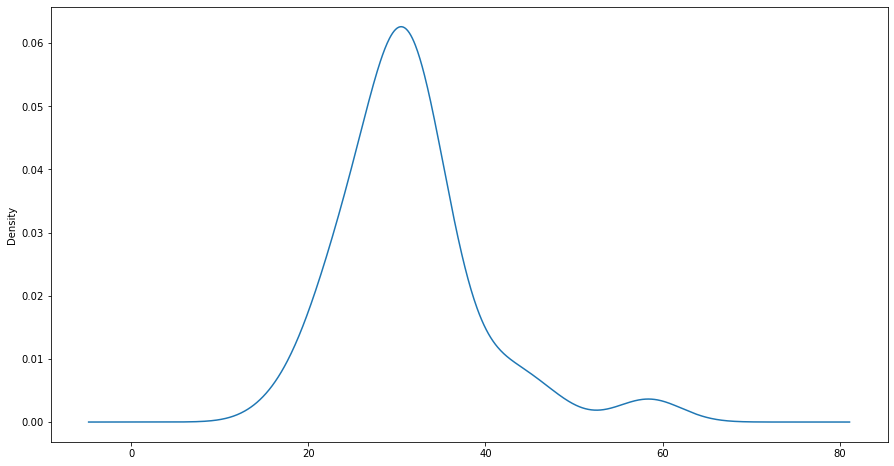

In [56]:
# distribution of winning_percentage
plt.figure(figsize=(15,8))
newdf["winning_percent"].plot(kind="kde")
plt.show()

# 4.	Is there a significant difference in the winning percentage for teams which have attained a best position between 1-3 and those teams which have had a best position between 4-7.



H0 :  there is no a significant difference in the winning percentage for teams which have attained a best position between 1-3 and those teams which have had a best position between 4-7

H1 :  there is a significant difference in the winning percentage for teams which have attained a best position between 1-3 and those teams which have had a best position between 4-7

In [20]:
newdf

,Pos,Team,Seasons,Points,GamesPlayed,GamesWon,GamesDrawn,GamesLost,GoalsFor,GoalsAgainst,...,Runner-up,Third,Fourth,Fifth,Sixth,T,Debut,Since/LastApp,BestPosition,winning_percent
1,1,Real Madrid,86,4385,2762,1647,552,563,5947,3140,...,23,8,8,3,4,79,1929,1929,1,59.630702
2,2,Barcelona,86,4262,2762,1581,573,608,5900,3114,...,25,12,12,4,6,83,1929,1929,1,57.241130
3,3,Atletico Madrid,80,3442,2614,1241,598,775,4534,3309,...,8,16,9,7,6,56,1929,2002-03,1,47.475134
4,4,Valencia,82,3386,2664,1187,616,861,4398,3469,...,6,10,11,10,7,50,1931-32,1987-88,1,44.557057
5,5,Athletic Bilbao,86,3368,2762,1209,633,920,4631,3700,...,7,10,5,8,10,49,1929,1929,1,43.772629
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,57,Xerez,1,34,38,8,10,20,38,66,...,0,0,0,0,0,0,2009-10,2009-10,20,21.052632
58,58,Condal,1,22,30,7,8,15,37,57,...,0,0,0,0,0,0,1956-57,1956-57,16,23.333333
59,59,Atletico Tetuan,1,19,30,7,5,18,51,85,...,0,0,0,0,0,0,1951-52,1951-52,16,23.333333
60,60,Cultural Leonesa,1,14,30,5,4,21,34,65,...,0,0,0,0,0,0,1955-56,1955-56,15,16.666667


In [21]:
newdf["BestPosition"]=newdf["BestPosition"].astype(int)

In [22]:
a=newdf[(newdf['BestPosition']>=1) & (newdf['BestPosition']<=3)]
b=newdf[newdf['BestPosition'].between(4,7)]

In [23]:
import scipy.stats as stats

tval,pval=stats.ttest_ind(a['winning_percent'],b['winning_percent'])

In [24]:
print("tval",tval)
print("pval",pval)

tval 4.992715339447283
pval 1.5362101870160483e-05


In [25]:
if pval<0.05:
    print("reject null")
else:
    print("fail to reject null")

reject null


Since p<alpha we conclude: there is a significant difference in the winning percentage for teams which have attained a best position between 1-3 and those teams which have had a best position between 4-7

# 2. A study was done to measure the blood pressure of 60 year old women with glaucoma. A random sample of 200 60-year old women with glaucoma was chosen. The mean of the systolic blood pressure in the sample was 140 mm Hg and the standard deviation was 25 mm Hg.

In [26]:
n=200
sample_mean=140
sd=25

# a)	Calculate the estimated standard error of the sample mean? What does the standard error indicate?



In [27]:
SE=sd/np.sqrt(n)
SE

1.7677669529663687

# b)	Estimate a 95% confidence interval for the true mean blood pressure for all 60-year old women with glaucoma.


In [28]:
con=0.95
alpha=1-con
Ci=stats.norm.interval(0.95,loc=sample_mean,scale=SE)
print("95% confidence interval is",Ci)

95% confidence interval is (136.5352404391258, 143.4647595608742)


# c)	Assume that instead of 200, a random sample of only 100 60-year old women with glaucoma was chosen. The sample mean and standard deviation estimates are the same as those in the original study. What is the estimated 95% confidence interval for the true mean blood pressure?


In [29]:
SE2=sd/np.sqrt(100)
SE2

2.5

In [30]:
n=100
sample_mean=140
sd=2.5
Confidence_interval=stats.norm.interval(0.95,loc=sample_mean,scale=SE2)
print("95% confidence interval is",Confidence_interval)

95% confidence interval is (135.10009003864985, 144.89990996135015)


# d)	Which of the two above intervals are wider?


In [31]:
print("95% confidence interval is with sample_size 100",Confidence_interval)
print("95% confidence interval is with sample_size 200",Ci)

95% confidence interval is with sample_size 100 (135.10009003864985, 144.89990996135015)
95% confidence interval is with sample_size 200 (136.5352404391258, 143.4647595608742)


In [32]:
Ci>Confidence_interval

True

In [33]:
#the interval with sample size 200 is wider

# e)	Explain in non-technical terms why the estimated standard error of a sample mean tends to decrease with an increase in sample size.


In [34]:
print('standard error of sample size 200 is ',round(SE,2))
print('standard error of sample size 100 is ',SE2)

standard error of sample size 200 is  1.77
standard error of sample size 100 is  2.5


Standard error is the standard deviation of the sample distribution.The sample size increases i.e. the sample size move towards attaining the true population size, because of which sample mean tends to move towards the population mean and hence the standard error decreases with increase in sample size

# 3. Par Inc., is a major manufacturer of golf equipment. Management believes that Par’s market share could be increased with the introduction of a cut-resistant, longer-lasting golf ball. Therefore, the research group at Par has been investigating a new golf ball coating designed to resist cuts and provide a more durable ball. The tests with the coating have been promising.

One of the researchers voiced concern about the effect of the new coating on driving distances. Par would like the new cut-resistant ball to offer driving distances comparable to those of the current-model golf ball. To compare the driving distances for the two balls, 40 balls of both the new and current models were subjected to distance tests. The testing was performed with a mechanical hitting machine so that any difference between the mean distances for the two models could be attributed to a difference in the design. The results of the tests, with distances measured to the nearest yard, are contained in   the data set “Golf”.



Loading required dataset

In [35]:
golf=pd.read_csv("Golf.csv")
golf.head(5)

,Current,New
0,264,277
1,261,269
2,267,263
3,272,266
4,258,262


In [36]:
golf.shape

(40, 2)

In [37]:
golf.describe()

,Current,New
count,40.000000,40.000000
mean,270.275000,267.500000
std,8.752985,9.896904
min,255.000000,250.000000
25%,263.000000,262.000000
50%,270.000000,265.000000
75%,275.250000,274.500000
max,289.000000,289.000000


In [38]:
golf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   Current  40 non-null     int64
 1   New      40 non-null     int64
dtypes: int64(2)
memory usage: 768.0 bytes


# 1.	Formulate and present the rationale for a hypothesis test that Par could use to compare the driving distances of the current and new golf balls.


In [ ]:
HO:There is a difference between driving distances of current and new golf balls
    
H1:There is no difference between driving distances of current and new golf balls
   

In [ ]:
# t-test for independence can be done as pop sd is also not known

# 2.	Analyze the data to provide the hypothesis testing conclusion. What is the p-value for your test? What is your recommendation for Par Inc.?


In [40]:
from scipy.stats import ttest_1samp,ttest_ind,ttest_rel
tstat,p=ttest_ind(golf["Current"],golf["New"])
tstat,p

(1.3283615935245678, 0.18793228491854663)

In [41]:
alpha=0.05
if p<alpha:
    print("reject null")
else:
    print("fail to reject null")

fail to reject null


Hence we conclude that there is significant difference between driving distances of current and new golf balls

# 3.	What is the 95% confidence interval for the population mean of each model, and what is the 95% confidence interval for the difference between the means of the two population?


In [42]:
Ci_current=stats.norm.interval(0.95,loc=np.mean(golf["Current"]),scale=np.std(golf["Current"])/len(golf))
print("Confidence interval for new is:",Ci_current)

Confidence interval for new is: (269.8515066610662, 270.69849333893376)


In [43]:
Ci_new=stats.norm.interval(0.95,loc=np.mean(golf["New"]),scale=np.std(golf["New"])/len(golf))
print("Confidence interval for new is:",Ci_new)

Confidence interval for new is: (267.0211607019467, 267.9788392980533)


In [55]:
a=golf['New']
b=golf['Current']
mu3=abs(np.mean(b)-np.mean(a))
se3=(np.std(a,ddof=1)-np.std(b,ddof=1))/np.sqrt(40)
df=len(a)+len(b)-2
print('95% confidence interval for the difference between the means of the two population',stats.t.interval(0.95,loc=mu3,scale=se3,df=df))

95% confidence interval for the difference between the means of the two population (2.4149163395873505, 3.135083660412604)
